## Imports 

In [2]:
import pandas as pd
import numpy as np


## Load data 

In [4]:
df = pd.read_csv('/Users/celestedevalroger/code/celestedv/metro_seoul/raw_data/crowd2020-2023.csv')


/var/folders/9c/7dyxp0wd7jd1wf_7m1bk36kr0000gn/T/ipykernel_5841/2331541540.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/celestedevalroger/code/celestedv/metro_seoul/raw_data/crowd2020-2023.csv')


## Preprocessing 

In [6]:
import sys
sys.path.append('/Users/celestedevalroger/code/celestedv/metro_seoul/metro_app/ml_logic')

from preprocess import general_preprocessing
from preprocess import model_data_preprocessing


In [7]:
df = general_preprocessing(df)


/Users/celestedevalroger/code/celestedv/metro_seoul/metro_app/ml_logic/preprocess.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/Users/celestedevalroger/code/celestedv/metro_seoul/metro_app/ml_logic/preprocess.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['line'] = df['line'].astype('int')


In [8]:
dic = {
'신촌': 'Sinchon',
'교대(법원.검찰청)': 'Seoul National Univ. of Education(Court & Prosecutors Office)',
'화랑대(서울여대입구)': 'Hwarangdae',
'남한산성입구(성남법원.검찰청)': 'Namhansanseong',
'동대문역사문화공원(DDP)(DDP)': 'Dongdaemun History Culture Park',
'낙성대': 'Nakseongdae',
'용마산': 'Yongmasan'
}

df.replace({'station_name': dic}, inplace = True)


In [9]:
df_final = model_data_preprocessing(df)


In [10]:
df_final.reset_index(inplace=True)


In [11]:
df_exit = df_final[df_final['entry/exit'] == 'exit']


In [12]:
df_exit['station_name_line'] = df_exit['station_name'] + ' ' + df_exit['line'].apply(str)


/var/folders/9c/7dyxp0wd7jd1wf_7m1bk36kr0000gn/T/ipykernel_5841/3001484146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exit['station_name_line'] = df_exit['station_name'] + ' ' + df_exit['line'].apply(str)


In [13]:
df_lstm_exit = pd.pivot(df_exit.drop(columns = ['station_name','line', 'station_number', 'entry/exit']), index=['station_name_line'], columns='datetime', values='value')


In [14]:
df_lstm_exit


datetime,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00,2020-01-01 05:00:00,2020-01-01 06:00:00,2020-01-01 07:00:00,2020-01-01 08:00:00,2020-01-01 09:00:00,2020-01-01 10:00:00,...,2023-06-30 15:00:00,2023-06-30 16:00:00,2023-06-30 17:00:00,2023-06-30 18:00:00,2023-06-30 19:00:00,2023-06-30 20:00:00,2023-06-30 21:00:00,2023-06-30 22:00:00,2023-06-30 23:00:00,2023-07-01 00:00:00
station_name_line,,,,,,,,,,,,,,,,,,,,,
Achasan(Rear Entrance to Seoul Children's Grand Park) 5,0.0,0.0,0.0,0.0,239.0,2572.0,721.0,297.0,357.0,462.0,...,755.0,987.0,1282.0,2156.0,1430.0,902.0,800.0,708.0,450.0,0.0
Aeogae 5,0.0,0.0,0.0,0.0,16.0,64.0,61.0,84.0,100.0,103.0,...,309.0,399.0,527.0,892.0,505.0,277.0,285.0,319.0,209.0,0.0
Ahyeon 2,0.0,0.0,0.0,0.0,37.0,106.0,92.0,151.0,160.0,131.0,...,608.0,646.0,915.0,1351.0,883.0,627.0,564.0,601.0,492.0,0.0
Amsa 8,0.0,0.0,0.0,0.0,37.0,157.0,150.0,282.0,287.0,275.0,...,955.0,1209.0,1839.0,2834.0,2218.0,1204.0,963.0,1156.0,766.0,0.0
Anam(Korea Univ. Hospital) 6,0.0,0.0,0.0,0.0,45.0,162.0,109.0,135.0,182.0,175.0,...,527.0,510.0,567.0,932.0,676.0,422.0,436.0,477.0,361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yeouinaru 5,0.0,0.0,0.0,0.0,37.0,316.0,408.0,257.0,176.0,193.0,...,808.0,784.0,936.0,1231.0,815.0,541.0,389.0,259.0,153.0,0.0
Yongdap 2,0.0,0.0,0.0,0.0,10.0,44.0,34.0,31.0,47.0,39.0,...,154.0,224.0,228.0,494.0,275.0,178.0,183.0,236.0,156.0,0.0
Yongdu (Dongdaemun-gu Office) 2,0.0,0.0,0.0,0.0,2.0,24.0,24.0,36.0,44.0,47.0,...,146.0,191.0,200.0,314.0,181.0,109.0,114.0,101.0,86.0,0.0


In [15]:
df_lstm_exit_T = df_lstm_exit.T


In [16]:
df_lstm_exit_T


station_name_line,Achasan(Rear Entrance to Seoul Children's Grand Park) 5,Aeogae 5,Ahyeon 2,Amsa 8,Anam(Korea Univ. Hospital) 6,Anguk 3,Apgujeong 3,Balsan 5,Bangbae 2,Banghwa 5,...,Yeongdeungpo-gu Office 2,Yeongdeungpo-gu Office 5,Yeonsinnae 3,Yeonsinnae 6,Yeouido 5,Yeouinaru 5,Yongdap 2,Yongdu (Dongdaemun-gu Office) 2,Yongmasan 7,Yongmasan(Yongma Falls Park) 7
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-01 05:00:00,239.0,16.0,37.0,37.0,45.0,34.0,37.0,29.0,71.0,0.0,...,74.0,8.0,72.0,NaN,31.0,37.0,10.0,2.0,39.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 20:00:00,902.0,277.0,627.0,1204.0,422.0,325.0,819.0,817.0,672.0,438.0,...,839.0,169.0,2486.0,NaN,403.0,541.0,178.0,109.0,NaN,371.0
2023-06-30 21:00:00,800.0,285.0,564.0,963.0,436.0,252.0,590.0,644.0,607.0,379.0,...,714.0,118.0,2053.0,NaN,319.0,389.0,183.0,114.0,NaN,371.0
2023-06-30 22:00:00,708.0,319.0,601.0,1156.0,477.0,196.0,554.0,580.0,711.0,445.0,...,787.0,170.0,2148.0,NaN,280.0,259.0,236.0,101.0,NaN,378.0


In [17]:
for column in df_lstm_exit_T.columns:
    if df_lstm_exit_T[column].isna().sum() > 0:
        df_lstm_exit_T.drop(columns=column, inplace=True)
    else:
        pass


In [18]:
final_lstm_df_exit = df_lstm_exit_T.T


In [19]:
final_lstm_df_exit.shape


(261, 30648)

In [20]:
final_lstm_df_exit


datetime,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00,2020-01-01 05:00:00,2020-01-01 06:00:00,2020-01-01 07:00:00,2020-01-01 08:00:00,2020-01-01 09:00:00,2020-01-01 10:00:00,...,2023-06-30 15:00:00,2023-06-30 16:00:00,2023-06-30 17:00:00,2023-06-30 18:00:00,2023-06-30 19:00:00,2023-06-30 20:00:00,2023-06-30 21:00:00,2023-06-30 22:00:00,2023-06-30 23:00:00,2023-07-01 00:00:00
station_name_line,,,,,,,,,,,,,,,,,,,,,
Achasan(Rear Entrance to Seoul Children's Grand Park) 5,0.0,0.0,0.0,0.0,239.0,2572.0,721.0,297.0,357.0,462.0,...,755.0,987.0,1282.0,2156.0,1430.0,902.0,800.0,708.0,450.0,0.0
Aeogae 5,0.0,0.0,0.0,0.0,16.0,64.0,61.0,84.0,100.0,103.0,...,309.0,399.0,527.0,892.0,505.0,277.0,285.0,319.0,209.0,0.0
Ahyeon 2,0.0,0.0,0.0,0.0,37.0,106.0,92.0,151.0,160.0,131.0,...,608.0,646.0,915.0,1351.0,883.0,627.0,564.0,601.0,492.0,0.0
Amsa 8,0.0,0.0,0.0,0.0,37.0,157.0,150.0,282.0,287.0,275.0,...,955.0,1209.0,1839.0,2834.0,2218.0,1204.0,963.0,1156.0,766.0,0.0
Anam(Korea Univ. Hospital) 6,0.0,0.0,0.0,0.0,45.0,162.0,109.0,135.0,182.0,175.0,...,527.0,510.0,567.0,932.0,676.0,422.0,436.0,477.0,361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yeonsinnae 3,0.0,0.0,0.0,0.0,72.0,483.0,373.0,541.0,761.0,835.0,...,1929.0,2413.0,2967.0,5328.0,4219.0,2486.0,2053.0,2148.0,1557.0,0.0
Yeouido 5,0.0,0.0,0.0,0.0,31.0,178.0,199.0,236.0,338.0,261.0,...,965.0,1117.0,1323.0,2002.0,888.0,403.0,319.0,280.0,217.0,0.0
Yeouinaru 5,0.0,0.0,0.0,0.0,37.0,316.0,408.0,257.0,176.0,193.0,...,808.0,784.0,936.0,1231.0,815.0,541.0,389.0,259.0,153.0,0.0


In [21]:
test = final_lstm_df_exit.isna().any(axis=1).reset_index()
test[test[0] == True]


,station_name_line,0


## Model

In [23]:
# #Imports
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# from tensorflow.keras.layers import LSTM

# #LSTM Architecture
# model = Sequential()
# model.add(LSTM(units = 2, activation = 'tanh', input_shape = (261,30648,1))
# model.add(layers.Dense(1, activation = 'linear'))

# #Compilation
# model.compile(loss = 'mae', optimizer = Adam(lr=0.5), metrics = ['mse'])

# #Fit
# model.fit(X,y, epochs = 1000, verbose = 1)

# # #Predict
# model.predict(X)


SyntaxError: '(' was never closed (248227032.py, line 9)

In [25]:
df_lstm_exit_T


station_name_line,Achasan(Rear Entrance to Seoul Children's Grand Park) 5,Aeogae 5,Ahyeon 2,Amsa 8,Anam(Korea Univ. Hospital) 6,Anguk 3,Apgujeong 3,Balsan 5,Bangbae 2,Banghwa 5,...,Yeokchon 6,Yeoksam 2,Yeongdeungpo Market 5,Yeongdeungpo-gu Office 2,Yeongdeungpo-gu Office 5,Yeonsinnae 3,Yeouido 5,Yeouinaru 5,Yongdap 2,Yongdu (Dongdaemun-gu Office) 2
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 05:00:00,239.0,16.0,37.0,37.0,45.0,34.0,37.0,29.0,71.0,0.0,...,10.0,67.0,10.0,74.0,8.0,72.0,31.0,37.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 20:00:00,902.0,277.0,627.0,1204.0,422.0,325.0,819.0,817.0,672.0,438.0,...,285.0,856.0,423.0,839.0,169.0,2486.0,403.0,541.0,178.0,109.0
2023-06-30 21:00:00,800.0,285.0,564.0,963.0,436.0,252.0,590.0,644.0,607.0,379.0,...,278.0,718.0,454.0,714.0,118.0,2053.0,319.0,389.0,183.0,114.0
2023-06-30 22:00:00,708.0,319.0,601.0,1156.0,477.0,196.0,554.0,580.0,711.0,445.0,...,274.0,730.0,381.0,787.0,170.0,2148.0,280.0,259.0,236.0,101.0


In [60]:
def df_to_X_y(df, window_size=8760): #8760 corresponds to one year of data
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)


In [61]:
WINDOW_SIZE = 8760
X,y = df_to_X_y(df_lstm_exit_T["Achasan(Rear Entrance to Seoul Children's Grand Park) 5"], WINDOW_SIZE)


In [65]:
print(X.shape)
print(y.shape)


(21888, 8760, 1)
(21888,)


In [66]:
X_train, y_train = X[:21450], y[:21450]   #0.7 train split
X_val, y_val = X[21450:24514], y[21450:24514]   #0.1 val split
X_test, y_test =  X[:24514], y[:24514]     #O.2 test split


In [67]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape,  X_test.shape, y_test.shape


((21450, 8760, 1),
 (21450,),
 (438, 8760, 1),
 (438,),
 (21888, 8760, 1),
 (21888,))

In [68]:
#Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


In [72]:
#LSTM Architecture
model1 = Sequential()

model1.add(InputLayer((8760,1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
cp = ModelCheckpoint('model1/', save_best_only=True) #only save the best model (the one with the smallest validation loss)
model1.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate = 0.01), metrics = [RootMeanSquaredError()])


In [74]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, callbacks = [cp])


Epoch 1/10
671/671 [==============================] - ETA: 0s - loss: 145604.9531 - root_mean_squared_error: 381.5822INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


671/671 [==============================] - 780s 1s/step - loss: 145604.9531 - root_mean_squared_error: 381.5822 - val_loss: 104334.3281 - val_root_mean_squared_error: 323.0082
Epoch 2/10
671/671 [==============================] - ETA: 0s - loss: 84240.6094 - root_mean_squared_error: 290.2423INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


671/671 [==============================] - 1145s 2s/step - loss: 84240.6094 - root_mean_squared_error: 290.2423 - val_loss: 103223.9453 - val_root_mean_squared_error: 321.2848
Epoch 3/10
671/671 [==============================] - 783s 1s/step - loss: 88512.3672 - root_mean_squared_error: 297.5103 - val_loss: 125267.6250 - val_root_mean_squared_error: 353.9317
Epoch 4/10
671/671 [==============================] - ETA: 0s - loss: 86048.3125 - root_mean_squared_error: 293.3399INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


671/671 [==============================] - 855s 1s/step - loss: 86048.3125 - root_mean_squared_error: 293.3399 - val_loss: 102407.6328 - val_root_mean_squared_error: 320.0119
Epoch 5/10
671/671 [==============================] - 879s 1s/step - loss: 85534.0625 - root_mean_squared_error: 292.4621 - val_loss: 103994.7109 - val_root_mean_squared_error: 322.4821
Epoch 6/10
671/671 [==============================] - 768s 1s/step - loss: 91465.3984 - root_mean_squared_error: 302.4325 - val_loss: 125646.5938 - val_root_mean_squared_error: 354.4666
Epoch 7/10
671/671 [==============================] - 907s 1s/step - loss: 98857.5859 - root_mean_squared_error: 314.4163 - val_loss: 114439.8516 - val_root_mean_squared_error: 338.2896
Epoch 8/10
671/671 [==============================] - ETA: 0s - loss: 98698.9375 - root_mean_squared_error: 314.1639INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


671/671 [==============================] - 769s 1s/step - loss: 98698.9375 - root_mean_squared_error: 314.1639 - val_loss: 98350.9922 - val_root_mean_squared_error: 313.6096
Epoch 9/10
671/671 [==============================] - 772s 1s/step - loss: 91420.5156 - root_mean_squared_error: 302.3582 - val_loss: 123087.4062 - val_root_mean_squared_error: 350.8381
Epoch 10/10
671/671 [==============================] - 769s 1s/step - loss: 136970.9531 - root_mean_squared_error: 370.0959 - val_loss: 155003.6094 - val_root_mean_squared_error: 393.7050


In [75]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')


In [76]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data ={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results


671/671 [==============================] - 211s 314ms/step


,Train Predictions,Actuals
0,-62.122700,0.0
1,-61.807545,0.0
2,-62.182178,0.0
3,-62.221058,0.0
4,-62.226353,33.0
...,...,...
21445,735.255737,607.0
21446,735.291626,818.0
21447,1155.939453,966.0
21448,1083.009521,1390.0


In [85]:
import pickle
pickle.dump(model1, open('lstm_model_test.pkl', 'wb'))


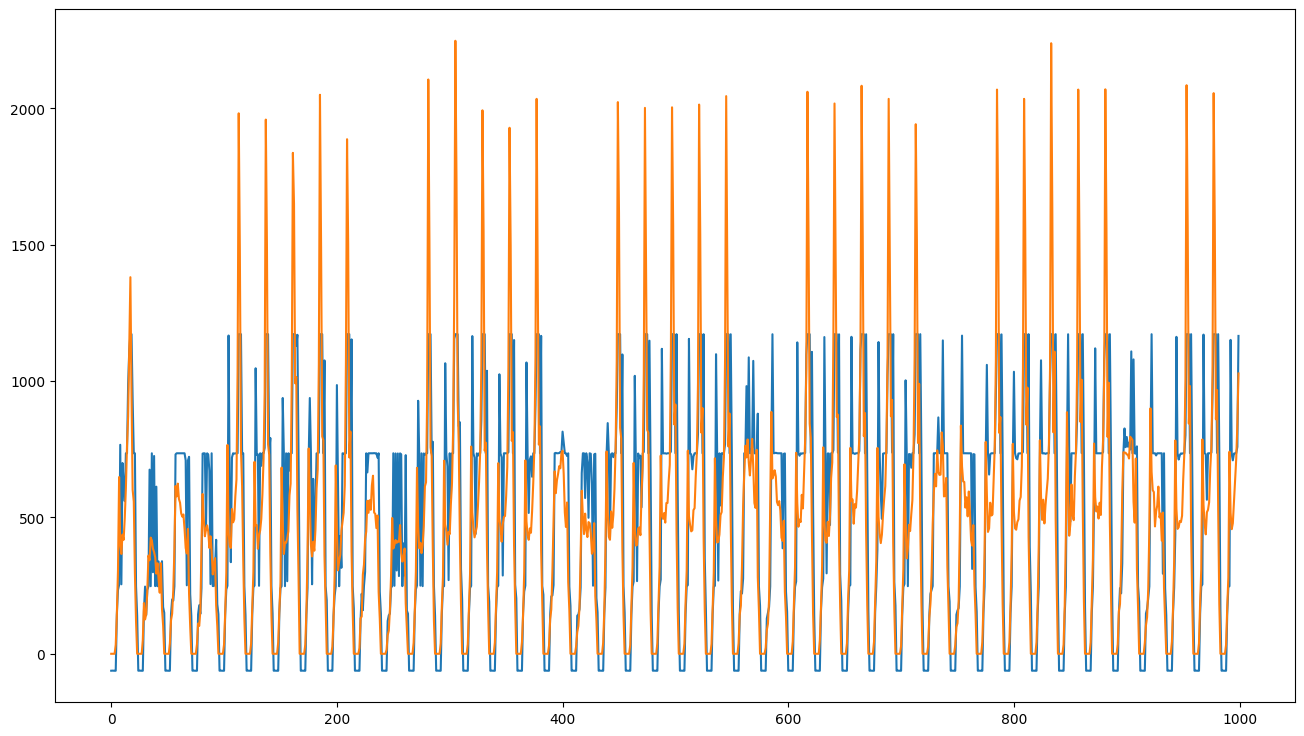

In [84]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,9))
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])


In [63]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data ={'val Predictions': val_predictions, 'Actuals': y_val})
train_results


14/14 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,771.354553,2572.0
1,978.999390,721.0
2,438.810791,297.0
3,545.411743,357.0
4,548.567810,462.0
...,...,...
21445,548.572632,550.0
21446,548.567871,542.0
21447,548.567871,448.0
21448,548.567871,402.0


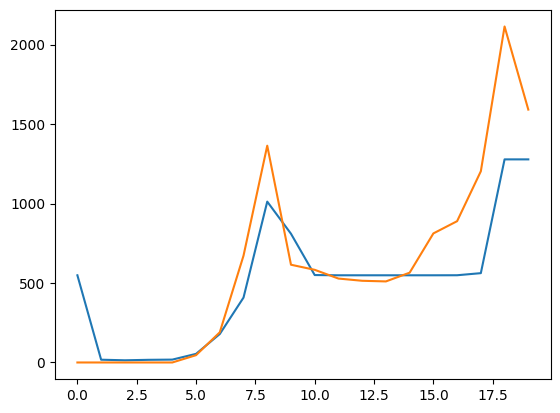

In [64]:
import matplotlib.pyplot as plt
plt.plot(val_results['val Predictions'][:20])
plt.plot(val_results['Actuals'][:20])
